# Project Solution Lab 2: 

# 问题：向用户推荐电影或节目

修改自：
- [使用 SageMaker、MXNet 和 Gluon 实施推荐系统](https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_applying_machine_learning/gluon_recommender_system/gluon_recommender_system.ipynb)
- [使用 MNIST 的因子分解机的简介](https://github.com/awslabs/amazon-sagemaker-examples/blob/master/introduction_to_amazon_algorithms/factorization_machines_mnist/factorization_machines_mnist.ipynb)
- [扩展 Amazon SageMaker 因子分解机算法以预测前 X 条推荐](https://aws.amazon.com/blogs/machine-learning/extending-amazon-sagemaker-factorization-machines-algorithm-to-predict-top-x-recommendations/)

## 业务场景简介

您为一家致力于为用户提供点播视频流式传输服务的初创公司工作。公司希望根据用户的观看历史为其介绍电影/节目推荐。

您的工作是利用机器学习来创建要在用户网站上使用的推荐引擎，以解决部分问题。您有权访问历史用户偏好和他们观看的电影的数据集。您可以使用该数据集训练机器学习模型，以推荐要观看的电影/节目。

## 关于该数据集  
Amazon 客户评论数据集是 1995 年至 2015 年期间 Amazon.com 市场上不同产品的评论的集合。客户评论是 Amazon 最重要的数据类型之一。自公司成立以来，收集和显示评论一直是 Amazon 文化的一部分，并且可以说是创新的重要源头之一。有关该数据集的更多详细信息，请参阅 [Amazon 买家评论数据集](https://s3.amazonaws.com/amazon-reviews-pds/readme.html)。

本练习着重于视频的评论。视频数据集包含来自超过 200 万 Amazon 客户的 16 万数字视频的 1 至 5 星的星级评分。

### 特征

**数据列**

- `marketplace`：两个字母的国家/地区代码（在本例中，全为“US”）
- `customer_id`：随机标识符，可用于汇总单个作者撰写的评论
- `review_id`：评论的唯一 ID
- `product_id`：Amazon 标准识别码 (ASIN)。http://www.amazon.com/dp/&lt;ASIN\> 链接到产品的详情页面。
- `product_parent`：ASIN 的父级。多个 ASIN（同一产品的颜色或格式变体）可以汇总到单个父级。
- `product_title`：产品名称说明
- `product_category`：可用于对评论进行分组的广泛产品类别（在本例中为数字视频）
- `star_rating`：产品评分（1 至 5 星）
- `helpful_votes`：评论的有用票数
– 'total_votes'：审阅收到的总投票
- `vine`：评论是否是作为 Vine 计划的一部分编写的？
- `verified_purchase`：评论是否是来自经过验证的购买？
- `review_headline`：评论本身的标题
- `review_body`：评论文本
- `review_date`：编写评论的日期 

**数据格式**
- 制表符 `\t` 分隔文本文件，不带引号或转义符
- 每个文件的第一行是标题；1 行对应 1 条记录

### 数据集属性

网站：https://s3.amazonaws.com/amazon-reviews-pds/readme.html

该数据集经过 Amazon 许可提供给您，并要遵守 AWS 数字培训服务协议（可从 https://aws.amazon.com/training/digital-training-agreement 获取）的条款。明确禁止出于完成本实验之外的目的复制、修改、出售、导出或使用该数据集。

## 集体讨论和设计…

…可以通过机器学习解答的问题。

大多数项目的第一步是考虑您要提出的问题，可用数据如何支持该问题，以及您将使用哪种工具（在本例中为机器学习模型）来解答问题。这是非常重要的一步，因为它有助于缩小探索范围并明确您将要使用的特征。

请花一点时间在下面的单元格中写下您对数据集的想法。您可以通过机器学习预测哪些事情？ 为什么从业务/客户角度来看具有相关性？ 阐明为什么您认为这些想法很重要。

In [ ]:
# 在此处写下想法

关于如何处理数据，我们可能会有若干想法，但是目前，所有人都将致力于向特定用户推荐视频。

## 推荐和因子分解机

在许多方面，推荐系统推动了机器学习目前的流行。亚马逊最早的成就之一就是“购买该产品的客户，也购买了…”功能。数百万美元的 Netflix 奖金鼓舞了研究、提高了公众的认识，并激发了许多其他数据科学竞赛。

推荐系统可以利用多种数据源和机器学习算法。大多数将各种非监督、监督和强化的学习技术结合到一个整体框架中。但是，核心部分几乎都是基于用户对相似项目的历史评分以及其他相似用户的行为，预测用户对某一项目的评分（或购买）的模型。为此所需的最小数据集是用户项目评分的历史记录（我们已有）。

您将使用的方法是因子分解机。因子分解机是通用的监督式机器学习算法，适用于分类和回归任务。它是线性模型的扩展，旨在简要（简化）捕获高维稀疏数据集中特征之间的交互。这使其成为处理具有点击预测和项目推荐等功能的数据模式的理想之选。

# 步骤 1：问题定义和数据收集

在开始这个项目时，先在下面用几句话来总结在这个场景中要解决的业务问题和要实现的业务目标。同时说明您想让自己的团队衡量的业务指标。确定这些信息后，请清楚地写出机器学习问题陈述。最后，添加一两条备注，说明问题陈述所对应的机器学习的类型。

#### <span style="color: blue;">项目演示：在项目演示中总结这些详细信息。</span>

### 通读业务场景，然后：

### 1. 确定 ML 是否是适合部署的解决方案以及原因。
\# 在此处写下答案

### 2. 定义业务问题、成功指标和期望的 ML 输出。
\# 在此处写下答案

### 3. 确定您要解决的 ML 问题的类型。
\# 在此处写下答案

### 4. 分析您要使用的数据是否合适。
\# 在此处写下答案


### 设置

我们已经确定了工作重点，现在我们来进行一些设置，以便开始解决问题。

**注意：**该笔记本是在 `ml.m4.xlarge` 笔记本实例上创建和测试的。

首先指定：
- 要用于训练和模型数据的 Amazon Simple Storage Service (Amazon S3) 存储桶和前缀 (?)。它们应与笔记本实例、训练和托管位于同一区域。
- 用于提供数据访问权限以便进行训练和托管的 AWS Identity and Access Management (IAM) 角色 [Amazon 资源名称 (ARN)] (https://docs.aws.amazon.com/general/latest/gr/aws-arns-and-namespaces.html)。请参阅文档，了解如何创建这些角色。

**注意：**如果笔记本实例、训练和/或托管需要不止一个角色，请用相应的完整 IAM 角色的 ARN 字符串替换 `get_execution_role（）` 调用。

用实验账户提供的资源名称替换 **`<LabBucketName>`**。

In [1]:
# 根据您的信息更改存储桶和前缀
bucket = '<LabBucketName>'
bucket = 'ml-pipeline-bucket'
prefix = 'sagemaker-fm' 

import sagemaker
role = sagemaker.get_execution_role()

现在，加载该示例笔记本的其余部分所需的一些 Python 库。

In [2]:
import os, subprocess
import warnings
import pandas as pd
import numpy as np
import sagemaker
from sagemaker.mxnet import MXNet
import boto3
import json
import matplotlib.pyplot as plt
import seaborn as sns

# 添加它以显示单元中的所有输出，而不仅仅是最后一个
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 忽略警告
warnings.filterwarnings("ignore")

# 步骤 2：数据预处理和可视化  
在数据预处理阶段，您应该利用机会探索数据并将其可视化，以便更好地了解数据。首先，导入必要的库并将数据读入 Pandas dataframe。然后，探索数据。查看数据集的形状，探索要使用的列及其类型（数值型、分类型）。对各项特征执行基本统计，以便了解特征的均值和范围；深入分析目标列并确定其分布。

### 要考虑的具体问题
1. 您可以从对特征执行的基本统计中推断出什么？ 

2. 您可以从目标类的分布中推断出什么？

3. 您从数据探索中还推断出了什么？

#### <span style="color: blue;">项目演示：在项目演示中总结这些问题和其他类似问题的答案。</span>

首先将 Amazon S3 公有存储桶中的数据集引入这个笔记本环境。

In [3]:
# 检查文件是否已位于所需路径中，或者是否需要下载

base_path = '/home/ec2-user/SageMaker/project/data/AmazonReviews'
file_path = '/amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz'

if not os.path.isfile(base_path + file_path):
    subprocess.run(['mkdir', '-p', base_path])
    subprocess.run(['aws', 's3', 'cp', 's3://amazon-reviews-pds/tsv' + file_path, base_path])
else:
    print('File already downloaded!')

CompletedProcess(args=['mkdir', '-p', '/home/ec2-user/SageMaker/project/data/AmazonReviews'], returncode=0)

CompletedProcess(args=['aws', 's3', 'cp', 's3://amazon-reviews-pds/tsv/amazon_reviews_us_Digital_Video_Download_v1_00.tsv.gz', '/home/ec2-user/SageMaker/project/data/AmazonReviews'], returncode=0)

### 读取数据集

将数据读取到 Pandas dataframe 中，以便您知道要处理的内容。

**注意：**读取文件时，您要设置 `error_bad_lines = False`，因为似乎只有极少数记录会造成问题。

**提示：**您可以使用内置的 Python `read_csv` 函数（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)）。您可以将文件路径直接用于带有 `delimiter ='\ t'` 的 Pandas `read_csv`。

例如：`pd.read_csv('filename.tar.gz', delimiter = '\t', error_bad_lines=False)`

In [4]:
df = pd.read_csv(base_path + file_path,
                 delimiter='\t',
                 error_bad_lines=False)

b'Skipping line 92523: expected 15 fields, saw 22\n'
b'Skipping line 343254: expected 15 fields, saw 22\n'
b'Skipping line 524626: expected 15 fields, saw 22\n'
b'Skipping line 623024: expected 15 fields, saw 22\n'
b'Skipping line 977412: expected 15 fields, saw 22\n'
b'Skipping line 1496867: expected 15 fields, saw 22\n'
b'Skipping line 1711638: expected 15 fields, saw 22\n'
b'Skipping line 1787213: expected 15 fields, saw 22\n'
b'Skipping line 2395306: expected 15 fields, saw 22\n'
b'Skipping line 2527690: expected 15 fields, saw 22\n'


打印数据集的前几行。

**提示**：使用 `pandas.head(<number>)` 函数打印行。

In [5]:
df.head(3)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12190288,R3FU16928EP5TC,B00AYB1482,668895143,Enlightened: Season 1,Digital_Video_Download,5,0,0,N,Y,I loved it and I wish there was a season 3,I loved it and I wish there was a season 3... ...,2015-08-31
1,US,30549954,R1IZHHS1MH3AQ4,B00KQD28OM,246219280,Vicious,Digital_Video_Download,5,0,0,N,Y,As always it seems that the best shows come fr...,As always it seems that the best shows come fr...,2015-08-31
2,US,52895410,R52R85WC6TIAH,B01489L5LQ,534732318,After Words,Digital_Video_Download,4,17,18,N,Y,Charming movie,"This movie isn't perfect, but it gets a lot of...",2015-08-31


现在，所有列中包含什么信息？

### 数据集剖析

稍微熟悉一下数据，看看有什么可用的特征。

- `marketplace`：两个字母的国家/地区代码（在本例中，全为“US”）
- `customer_id`：随机标识符，可用于汇总单个作者撰写的评论
- `review_id`：评论的唯一 ID
- `product_id`：Amazon 标准识别码 (ASIN)。http://www.amazon.com/dp/&lt;ASIN\> 链接到产品的详情页面。
- `product_parent`：ASIN 的父级。多个 ASIN（同一产品的颜色或格式变体）可以汇总到单个父级。
- `product_title`：产品名称说明
- `product_category`：可用于对评论进行分组的广泛产品类别（在本例中为数字视频）
- `star_rating`：产品评分（1 至 5 星）
- `helpful_votes`：评论的有用票数
– 'total_votes'：评论获得的总票数
- `vine`：评论是否是作为 Vine 计划的一部分编写的？
- `verified_purchase`：评论是否是来自经过验证的购买？
- `review_headline`：评论本身的标题
- `review_body`：评论文本
- `review_date`：编写评论的日期

### 分析和处理数据集

#### 探索数据

**问题：**数据集中有多少行和列？

检查数据集的大小。 

**提示**：使用 `<dataframe>.shape` 函数检查 dataframe 的大小

In [6]:
df.shape

(3998345, 15)

Answer: (3998345,15)

**问题：**哪些列包含空值以及包含多少个空值？

打印数据集的摘要。

**提示**：借助使用关键字参数 `null_counts = True` 的 `<dataframe>.info` 函数

In [7]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998345 entries, 0 to 3998344
Data columns (total 15 columns):
marketplace          3998345 non-null object
customer_id          3998345 non-null int64
review_id            3998345 non-null object
product_id           3998345 non-null object
product_parent       3998345 non-null int64
product_title        3998345 non-null object
product_category     3998345 non-null object
star_rating          3998345 non-null int64
helpful_votes        3998345 non-null int64
total_votes          3998345 non-null int64
vine                 3998345 non-null object
verified_purchase    3998345 non-null object
review_headline      3998320 non-null object
review_body          3998267 non-null object
review_date          3998207 non-null object
dtypes: int64(5), object(10)
memory usage: 457.6+ MB


**Answer:** Review headline: 25, Review_body: 78, Review_date: 138

**问题：**是否有重复的行？ 如果有，有多少？

**提示**：使用 `dataframe.duplicated()` ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html#pandas.DataFrame.duplicated)) 筛选 dataframe，并检查新 dataframe 的长度。

In [8]:
duplicates = df[df.duplicated()]

len(duplicates)

0

**答案：**没有重复行。

### 数据预处理

现在是时候确定要使用哪些特征以及如何为模型做准备了。对于本示例，将自己限定到 `customer_id`、`product_id`、`product_title` 和 `star_rating`。在推荐系统中包括其他特征可能是有好处的，但需要进行大量处理（尤其是文本数据），这超出了该笔记本的范围。

缩小该数据集，仅使用提到的列。

**提示**：通过将列作为列表传递来选择多个列作为 dataframe。例如：`df[['column_name 1'、'column_name 2']]`

In [9]:
df_reduced = df[['customer_id', 'product_id', 'star_rating', 'product_title']]

缩小数据集后，检查是否重复。

In [10]:
duplicates = df_reduced[df_reduced.duplicated()]

len(duplicates)

131

**答案**：131

**问题：**为什么现在数据集中会有重复？ 缩小数据集后有什么变化？ 查看重复的前 20 行。

**提示**：使用 `pandas.head(<number>)` 函数打印行。

In [11]:
duplicates.head(20)

,customer_id,product_id,star_rating,product_title
565194,41454255,B00Y2UYRFS,1,unseen 2
594322,17570065,B00R3EEO2G,2,The Maze Runner
611264,15703996,B00I3MQNWG,5,Bosch Season 1
612471,28456429,B008Y6W7J4,5,Rabbit Hole
613791,52388381,B00YORA25I,5,"McFarland, USA (Theatrical)"
685156,31828958,B00TT53YSW,5,"Bates Motel, Season 3"
1204110,19462,B00QWUL4AW,5,Exodus: Gods and Kings
1564816,24892653,B00L2GPYKW,5,The Escape Artist Season 1
1601662,44513234,B00NY4UIKG,5,The Equalizer
1616429,43345475,B00P5968FC,3,The Babadook


**提示：**查看重复 dataframe 的前两个元素，并查询原始 dataframe df 以查看数据的样子。您可以使用 `query` 函数（[文档](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html)）。

例如：

```
df_eg = pd.DataFrame({
            'A': [1,2,3,4],
            'B': [
        })
df_eg.query('A > 1 &amp; B > 0')
```

In [12]:
df.query("customer_id == 17570065 &amp; product_id == 'B00R3EEO2G'")

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
588857,US,17570065,RZ0MXSMTR2WQP,B00R3EEO2G,226574237,The Maze Runner,Digital_Video_Download,2,0,0,N,Y,Two Stars,Simply doesn't engage the audience.,2015-06-08
594322,US,17570065,R26IBV6N1BV1VN,B00R3EEO2G,226574237,The Maze Runner,Digital_Video_Download,2,0,0,N,Y,Two Stars,Simply doesn't engage the audience.,2015-06-08


**答案：**数据集重复，因为有些产品具有相同的信息，但是 `review_id` 或 `product_id` 不同。

在继续操作之前，请删除重复行。

**提示**：使用 `~ `操作符选择所有不重复的行。例如：
    
```
df_eg = pd.DataFrame({
            'A': [1,2,3,4],
            'B': [2,0,5,2]
        })
df_eg[~(df_eg['B'] > 0)]
```

In [ ]:
df_reduced = df_reduced[~df_reduced.duplicated()]

### 可视化数据集中的某些行
如果您未在上面部分执行此操作，您可以使用下面的空间来进一步可视化某些数据。具体来看一下 `star_rating`、`customer_id` 和 `product_id` 等特征的分布。

**要考虑的特定问题**

1. 在查看了特征的分布之后，这些特征可以在多大程度上帮助模型？ 您可以通过分布情况推断出哪些可能有助于您更好地理解数据的信息？ 

2. 您应该使用所有数据吗？ 您应该使用哪些特征？

3. 哪个月份的用户评分计数最高？

使用下方的单元格可视化您的数据，并回答这些问题以及您可能感兴趣的其他问题。根据需要插入和删除单元格。

#### <span style="color: blue;">项目演示：在项目演示中总结这些问题以及类似问题的答案。</span>

使用 `sns.barplot`（[文档](https://seaborn.pydata.org/generated/seaborn.barplot.html)）绘制 `star_rating` 密度和分布。

,index,star_rating
0,5,2410533
1,4,756423
2,3,345891
3,1,289731
4,2,195767


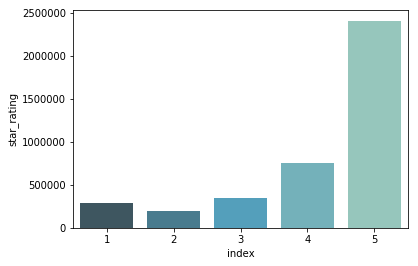

In [13]:
# 计算有具体评分的评论数
df['star_rating'].value_counts().reset_index()
sns.barplot(
    x='index',
    y='star_rating',
    data=_, # Python 中的下划线符号用于存储上一次操作的输出
    palette='GnBu_d'
)

**问题：**哪个月份的用户评分计数最高？

**提示**：  
1. 使用 `pd.to_datetime` 将 `review_date` 列转换为日期时间列。 
2. 使用 `review_date` 列中的月份。您可以使用 `<column_name>.dt.month` 访问日期时间列的月份。
3. 借助使用 `idxmax` 的 `groupby` 函数。


,review_date,star_rating
0,1.0,309083
1,2.0,369059
2,3.0,432084
3,4.0,363611
4,5.0,339285
5,6.0,328114
6,7.0,417844
7,8.0,464912
8,9.0,206453
9,10.0,218583


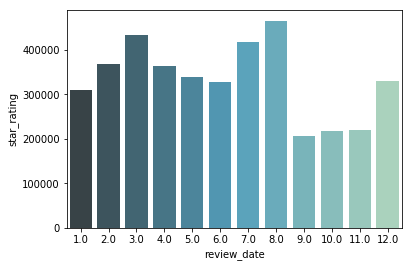

In [14]:
# 将评论日期转换为日期时间类型，并按月份计算评分数量
df['review_date'] = pd.to_datetime(df.review_date)
df.groupby(df.review_date.dt.month).star_rating.count().reset_index()
sns.barplot(x='review_date', y='star_rating', data=_, palette='GnBu_d')

In [15]:
max_month = df.groupby(df.review_date.dt.month).star_rating.count().idxmax()
print(f'The month with the most reviews is: {max_month}')

The month with the most reviews is: 8.0


**奖金问题（可选）：**评论最多和最少的年份分别是哪年？

,review_date,star_rating
0,2000.0,1
1,2001.0,1
2,2002.0,5
3,2003.0,4
4,2004.0,6
5,2005.0,11
6,2006.0,185
7,2007.0,2597
8,2008.0,3079
9,2009.0,3262


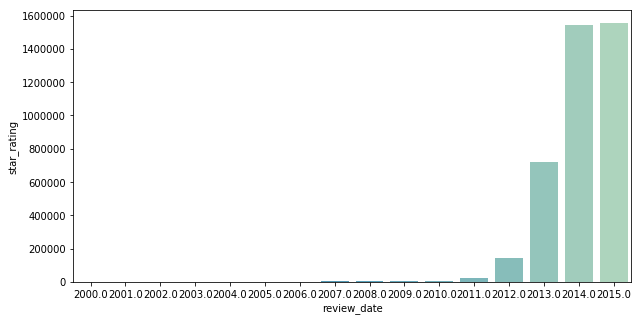

In [16]:
df.groupby(df.review_date.dt.year).star_rating.count().reset_index()
fig = plt.gcf()
fig.set_size_inches(10, 5)
sns.barplot(x='review_date', y='star_rating', data=_, palette='GnBu_d')

**答案：**数据量最少的年份是 2000 年和 2001 年，只有 1 条评论。评论数量最高的年份是 2015 年。

### 数据清理

**问题**：每个客户的评论数量和每个视频的评论数量有何不同？ 使用分位数找出答案。

**提示**：对客户和产品 dataframe 使用 `<dataframe>['columns_name'].value_counts()`，并使用 `<dataframe>.quantile(<list>)` 查找关系。

In [17]:
customers = df['customer_id'].value_counts()
products = df['product_id'].value_counts()

quantiles = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.25, 0.5,
             0.75, 0.9, 0.95, 0.96, 0.97, 0.98, 0.99, 0.995,
             0.999, 1]
print('customers\n', customers.quantile(quantiles))
print('products\n', products.quantile(quantiles))

customers
 0.000       1.0
0.010       1.0
0.020       1.0
0.030       1.0
0.040       1.0
0.050       1.0
0.100       1.0
0.250       1.0
0.500       1.0
0.750       2.0
0.900       4.0
0.950       5.0
0.960       6.0
0.970       7.0
0.980       9.0
0.990      13.0
0.995      18.0
0.999      37.0
1.000    2704.0
Name: customer_id, dtype: float64
products
 0.000        1.000
0.010        1.000
0.020        1.000
0.030        1.000
0.040        1.000
0.050        1.000
0.100        1.000
0.250        1.000
0.500        3.000
0.750        9.000
0.900       31.000
0.950       73.000
0.960       95.000
0.970      130.000
0.980      199.000
0.990      386.670
0.995      699.000
0.999     1993.901
1.000    32790.000
Name: product_id, dtype: float64


**答案：**仅有大约 5％ 的客户对 5 个或更多视频进行了评分，仅有 25％ 的视频获得了 9 个以上客户的评分。

筛选出此长尾。选择对 18 个或更多视频进行了评分的客户以及具有 95 个以上评论的产品。

In [18]:
customers1 = customers[customers >= 18]
products1 = products[products >= 95]

reduced_df = (
    df_reduced.merge(pd.DataFrame({'customer_id': customers1.index}))
              .merge(pd.DataFrame({'product_id': products1.index}))
)

**问题：** `customers1`、`products1` 和 新 dataframe reduced_df 是什么形状？

**注意**：对此使用 f 字符串：

```
x= 3
print(f'X = {x}')
```

In [19]:
print(f'Number of users is {customers1.shape[0]} and number of items is {products1.shape[0]}.')
print(f'Length of reduced df is {reduced_df.shape[0]}.')

Number of users is 10538 and number of items is 6683.
Length of reduced df is 173506.


打印 dataframe 的前 5 列。

In [20]:
reduced_df.head()

,customer_id,product_id,star_rating,product_title
0,11763902,B00PSLQYWE,4,Downton Abbey Season 5
1,1411480,B00PSLQYWE,5,Downton Abbey Season 5
2,35303629,B00PSLQYWE,5,Downton Abbey Season 5
3,21285980,B00PSLQYWE,5,Downton Abbey Season 5
4,29260449,B00PSLQYWE,5,Downton Abbey Season 5


**问题：** `reduced_df` 是否保持相同的评分率？

,index,star_rating
0,5,86202
1,4,42669
2,3,24471
3,2,10803
4,1,9361


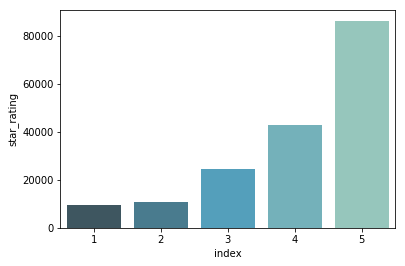

In [21]:
reduced_df['star_rating'].value_counts().reset_index()
sns.barplot(x='index', y='star_rating', data=_, palette='GnBu_d')

**答案：**星级评分为 1 星的评论数量与星级评分为 2 星的评论数量成比例下降。而原始数据的情况并非如此。

现在，重新创建每个客户和产品计数的客户和产品分布。 

**提示**：在 `customer_id` 和 `product_id` 列上使用 `value_counts()` 函数。

Text(0.5, 0.98, 'Distribution of counts per customer and product')

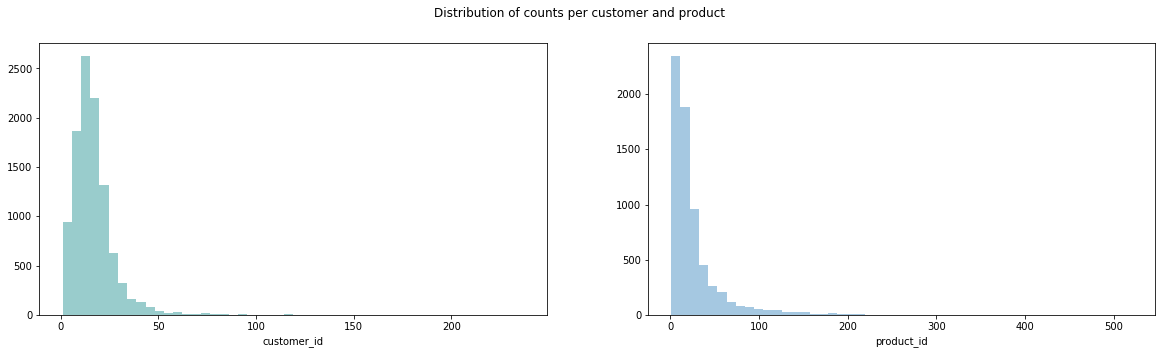

In [22]:
customers = reduced_df['customer_id'].value_counts()
products = reduced_df['product_id'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Distribution of counts per customer and product')
sns.distplot(customers, kde=False, ax=axs[0], color='teal')
sns.distplot(products, kde=False, ax=axs[1])

接下来，为每个用户和项目编号，指定它们自己的顺序索引。因此，您能够以稀疏格式保存信息，其中顺序索引表示评分矩阵中的行和列。

要创建 `customer_index` 和 `product_index`，请创建一个新 dataframe，其中将 `customer_id` 作为索引值，并为用户和项目编号建立一个顺序计数器/值。完成两个索引的创建后，请使用 Pandas `merge` 函数将 `customer_index` 与 `product_index 合并。

**提示**：使用 `shape` 函数生成客户和产品总数。使用 `np.arange` 生成一个从 0 到客户和产品数量的数值列表。

In [23]:
customer_index = pd.DataFrame({'customer_id': customers.index,
                               'user': np.arange(customers.shape[0])})
product_index = pd.DataFrame({'product_id': products.index,
                              'item': np.arange(products.shape[0])})

reduced_df = reduced_df.merge(customer_index).merge(product_index)
reduced_df.head()

,customer_id,product_id,star_rating,product_title,user,item
0,11763902,B00PSLQYWE,4,Downton Abbey Season 5,3065,103
1,1411480,B00PSLQYWE,5,Downton Abbey Season 5,130,103
2,35303629,B00PSLQYWE,5,Downton Abbey Season 5,4683,103
3,21285980,B00PSLQYWE,5,Downton Abbey Season 5,449,103
4,29260449,B00PSLQYWE,5,Downton Abbey Season 5,131,103


示例答案：
<div class="output_subarea"><div>

<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right">
      <th></th>
      <th>customer_id</th>
      <th>product_id</th>
      <th>star_rating</th>
      <th>product_title</th>
      <th>用户</th>
      <th>项目</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>11763902</td>
      <td>B00PSLQYWE</td>
      <td>4</td>
      <td>唐顿庄园第 5 季</td>
      <td>3065</td>
      <td>103</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1411480</td>
      <td>B00PSLQYWE</td>
      <td>5</td>
      <td>唐顿庄园第 5 季</td>
      <td>130</td>
      <td>103</td>
    </tr>
    <tr>
      <th>2</th>
      <td>35303629</td>
      <td>B00PSLQYWE</td>
      <td>5</td>
      <td>唐顿庄园第 5 季</td>
      <td>4683</td>
      <td>103</td>
    </tr>
    <tr>
      <th>3</th>
      <td>21285980</td>
      <td>B00PSLQYWE</td>
      <td>5</td>
      <td>唐顿庄园第 5 季</td>
      <td>449</td>
      <td>103</td>
    </tr>
    <tr>
      <th>4</th>
      <td>29260449</td>
      <td>B00PSLQYWE</td>
      <td>5</td>
      <td>唐顿庄园第 5 季</td>
      <td>131</td>
      <td>103</td>
    </tr>
  </tbody>
</table>
</div></div>